In [1]:
## Provide a wider display for easier viewing
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Now we're going to do something really cool - we're going to swap over to R to try an association rules analysis

In [1]:
## Bring in the libraries we need for the analysis

suppressMessages(library(tidyr))
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(arules))

In [2]:
## Set the directory to load the data file - the fact table

data.dir = "D:/Group Folder/Datasets/"

## Set the file name

data.file = "FactCouponRedeem.csv"

In [3]:
## Create a look up to the CSV file

coupon_fact_table = paste(data.dir, data.file, sep = "")

In [4]:
## Read in the fact table

suppressWarnings(suppressMessages(coupon_fact_df <- readr::read_csv(file = coupon_fact_table)))

In [5]:
## Confirm we loaded in ever row to the table

nrow(coupon_fact_df)

[1] 2777358

In [6]:
## Attach the df to R so we don't have to load it into memory everytime

attach(coupon_fact_df)

In [7]:
names(coupon_fact_df)

[1] "CouponID"           "Description"        "PlayerID"          
 [4] "AccountingDate"     "RedeemValue"        "RedeemCount"       
 [7] "SiteID"             "RedemptionNumber"   "ValidMonth"        
[10] "ValidYear"          "TypeCategory"       "TypeDescription"   
[13] "SubType"            "SubTypeDescription" "TargetPopKey"      
[16] "TargetPop"          "ProgramTypeKey"     "ProgramType"

## Carve out the columns that we require for the association rules analysis

- CouponID
- Month
- Year
- SiteID
- TargetPop
- ProgramType
- TypeDescription
- SubtypeDescription
- RedeemValue
- RedeemCount

In [8]:
columns_required <- c("CouponID", "PlayerID", "ValidMonth", "ValidYear", "SiteID", "TargetPop", "ProgramType",
                      "TypeDescription", "SubTypeDescription", "RedeemValue", 
                     "RedeemCount")

In [9]:
## Subset the dataframe to only the columns we care about
## We label it a transaction table since each couponID getting redeemed counts as a transcation

transaction_table <- coupon_fact_df[, columns_required]

In [96]:
## Show the structure of the "transaction" table

head(transaction_table, 20)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount
89729,530342410,12,16,1,VIP,Not Applicable,Hotel,ML,29,1
89729,710328524,12,16,1,VIP,Not Applicable,Hotel,ML,29,1
89093,1000600137,10,16,2,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,5,1
89729,710004002,12,16,1,VIP,Not Applicable,Hotel,ML,29,1
4,1000681589,4,7,2,New Member,Not Applicable,Other,Other,0,1
71400,1000681589,4,14,2,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,10,1
71396,1000681589,4,14,2,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,10,1
85239,1000681589,4,16,2,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,5,1
89729,530114875,12,16,1,VIP,Not Applicable,Hotel,ML,29,1
89729,530181290,12,16,1,VIP,Not Applicable,Hotel,ML,29,1


In [97]:
## Filter the table a little more

transaction_table_filtered <-
        transaction_table %>%
                filter(RedeemCount != 0) ## Remove any rows that have a zero redeem count

In [98]:
## Matching our row count from the first set of analyses in Python

nrow(transaction_table_filtered)

[1] 2777131

In [99]:
## Create a unique identifier for every redeemed coupon by combining the coupon id and playerid
## This should allow us to differentiate between different "transactions"

transaction_table_filtered$TransactionID <-
        paste(transaction_table_filtered$CouponID, transaction_table_filtered$PlayerID)

In [100]:
## Subset the transcation table into Casino 1 and Casino 2 - likely differences between the two

casino_1_df <- 
        transaction_table_filtered %>%
                filter(SiteID == 1)

casino_2_df <- 
        transaction_table_filtered %>%
                filter(SiteID == 2)

In [101]:
## Show the row counts for the new tables

nrow(casino_1_df)

nrow(casino_2_df)

[1] 1171888

[1] 1605243

In [130]:
casino_2_df %>%
        group_by(ValidYear) %>%
                summarise(count = n())

ValidYear,count
5,9
7,53433
9,1
10,2723
11,3
12,14723
13,171
14,36192
15,2960
16,51303


In [102]:
## Show the top 6 rows to see how the dataframe structure has changed

head(casino_1_df)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount,TransactionID
89729,530342410,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 530342410
89729,710328524,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 710328524
89729,710004002,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 710004002
89729,530114875,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 530114875
89729,530181290,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 530181290
89729,530315284,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 530315284


In [103]:
## Move the transactionID to the first column in the dataframe
## Remove SiteID since we don't really require it for this analysis

casino_1_df <- casino_1_df %>%
                    select(TransactionID, everything(), -SiteID)

In [104]:
## Look at a certain subsection of the data, that we will use to generate the Association rules

head(casino_1_df[, 4:10])

ValidMonth,ValidYear,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue
12,16,VIP,Not Applicable,Hotel,ML,29
12,16,VIP,Not Applicable,Hotel,ML,29
12,16,VIP,Not Applicable,Hotel,ML,29
12,16,VIP,Not Applicable,Hotel,ML,29
12,16,VIP,Not Applicable,Hotel,ML,29
12,16,VIP,Not Applicable,Hotel,ML,29


In [105]:
####### Arules library requires a significant transformation before it can be fed in
#### We'll try this with one table first

trans_id <- as.character(casino_1_df[["TransactionID"]])
casino_1_df <- casino_1_df[, 4:10]

for (i in 1:ncol(casino_1_df)) casino_1_df[[i]] <- as.factor(casino_1_df[[i]])

trans <- as(casino_1_df, "transactions")

transactionInfo(trans)[["transactionID"]] <- trans_id

In [106]:
## Confirm the rules generated successfully

head(trans)

transactions in sparse format with
 6 transactions (rows) and
 414 items (columns)

In [107]:
## Use the apriori function to generate a set of rules based on the "transactions"
## we created above.  We just want to see if there's anything that could of worthwhile interest
## from mining the coupon redemptions

casino_1_rules <- apriori(trans, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 234377 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[414 item(s), 1171888 transaction(s)] done [0.64s].
sorting and recoding items ... [8 item(s)] done [0.05s].
creating transaction tree ... done [0.49s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [36 rule(s)] done [0.00s].
creating S4 object  ... done [0.14s].


In [108]:
casino_1_arules_df <- DATAFRAME(casino_1_rules)

In [109]:
## Re-order the dataframe by lift

casino_1_arules_df_arranged <- casino_1_arules_df <- casino_1_arules_df %>%
                                                            arrange(desc(lift))

In [110]:
## Show the first 20 rows of the dataframe

head(casino_1_arules_df_arranged, 50)

LHS,RHS,support,confidence,lift,count
"{ProgramType=Not Applicable,TypeDescription=Cash}",{SubTypeDescription=Bonus},0.2275516,0.5068048,2.0802823,266665
"{TargetPop=Not Applicable,TypeDescription=Cash}",{SubTypeDescription=Bonus},0.2102803,0.5067939,2.0802375,246425
"{TargetPop=Not Applicable,ProgramType=Not Applicable,TypeDescription=Cash}",{SubTypeDescription=Bonus},0.2102803,0.5067939,2.0802375,246425
{SubTypeDescription=Bonus},{TypeDescription=Cash},0.2275610,0.9340698,2.0801349,266676
{TypeDescription=Cash},{SubTypeDescription=Bonus},0.2275610,0.5067689,2.0801349,266676
"{ProgramType=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2275516,0.9340673,2.0801292,266665
"{TargetPop=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2102803,0.9290362,2.0689253,246425
"{TargetPop=Not Applicable,ProgramType=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2102803,0.9290362,2.0689253,246425
"{ValidYear=17,ProgramType=Not Applicable}",{TargetPop=Not Applicable},0.3318722,0.9472357,1.2368595,388917
"{ProgramType=Not Applicable,SubTypeDescription=Bonus}",{TargetPop=Not Applicable},0.2263424,0.9291039,1.2131837,265248


## Our association rules dataframe does not give us much information for Casino 1.  Much of the data is "Not Applicable" so that doesn't leave us much to work with.

## We can run the same analysis on Casino 2 and determine if there is any useful information in there.

In [25]:
## Move the transactionID to the first column in the dataframe
## Remove SiteID since we don't really require it for this analysis

casino_2_df <- casino_2_df %>%
                    select(TransactionID, everything(), -SiteID)

In [26]:
## Look at a certain subsection of the data, that we will use to generate the Association rules

head(casino_2_df[, 4:10])

ValidMonth,ValidYear,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue
10,16,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,5
4,7,New Member,Not Applicable,Other,Other,0
4,14,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,10
4,14,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,10
4,16,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,5
1,17,VIP,Not Applicable,Hotel,HK,29


In [27]:
####### Arules library requires a significant transformation before it can be fed in
#### We'll try this with one table first

trans_id_2 <- as.character(casino_2_df[["TransactionID"]])
casino_2_df <- casino_2_df[, 4:10]

for (i in 1:ncol(casino_2_df)) casino_2_df[[i]] <- as.factor(casino_2_df[[i]])

trans_2 <- as(casino_2_df, "transactions")

transactionInfo(trans_2)[["transactionID"]] <- trans_id_2

In [28]:
## Confirm the rules generated successfully

head(trans_2)

transactions in sparse format with
 6 transactions (rows) and
 383 items (columns)

In [29]:
## Use the apriori function to generate a set of rules based on the "transactions"
## we created above.  We just want to see if there's anything that could of worthwhile interest
## from mining the coupon redemptions

casino_2_rules <- apriori(trans_2, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 321048 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[383 item(s), 1605243 transaction(s)] done [0.91s].
sorting and recoding items ... [12 item(s)] done [0.08s].
creating transaction tree ... done [0.90s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [24 rule(s)] done [0.00s].
creating S4 object  ... done [0.23s].


In [30]:
## Convert our completed rules into a dataframe

casino_2_arules_df <- DATAFRAME(casino_2_rules)

In [92]:
## Re-order the dataframe by lift

casino_2_arules_df_arranged <- casino_2_arules_df %>%
                                arrange(desc(lift))

In [93]:
head(casino_2_arules_df_arranged, 50)

LHS,RHS,support,confidence,lift,count
"{TargetPop=Loyalty,TypeDescription=Hotel}",{ProgramType=Gazette},0.2073462,0.9747555,4.701017,332841
"{ProgramType=Gazette,TypeDescription=Hotel}",{TargetPop=Loyalty},0.2073462,1.0000000,4.602834,332841
"{TypeDescription=Hotel,RedeemValue=29}",{SubTypeDescription=All},0.2296836,0.8232696,3.083255,368698
"{TypeDescription=Hotel,SubTypeDescription=All}",{RedeemValue=29},0.2296836,0.8601958,3.068169,368698
"{SubTypeDescription=All,RedeemValue=29}",{TypeDescription=Hotel},0.2296836,1.0000000,2.834596,368698
"{TargetPop=Loyalty,ProgramType=Gazette}",{TypeDescription=Hotel},0.2073462,0.9999820,2.834545,332841
"{ProgramType=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2601002,0.9679965,2.420022,417524
"{TargetPop=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2507159,0.9668384,2.417127,402460
"{TargetPop=Not Applicable,ProgramType=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2507159,0.9668384,2.417127,402460
"{ProgramType=Not Applicable,TypeDescription=Cash}",{SubTypeDescription=Bonus},0.2601002,0.6552984,2.412789,417524


## Support: how often does these items appear together?
- count of itemsets (X, Y) / all transactions containing (X, Y)

## Confidence (strength of association): given my LHS, how often do we see our RHS?
- P(Y | X)

## Lift (co-occurence vs pure chance): how often do I see LHS with RHS, compared to pure chance or coincidence?
- supp(X -> Y) / s(X) * s(Y)

In [32]:
## Set up player file

player.file = "PlayerDay.csv"

## Set up player day table

player_day_table = paste(data.dir, player.file, sep = "")

In [33]:
## Read in the player day table

suppressWarnings(suppressMessages(player_day_df <- readr::read_csv(file = player_day_table)))

In [34]:
## Confirm we loaded in ever row to the table

nrow(player_day_df)

[1] 7292910

In [35]:
## Attach the df to R so we don't have to load it into memory everytime

attach(player_day_df)

The following objects are masked from coupon_fact_df:

    PlayerID, SiteID



In [36]:
## Show the available columns

names(player_day_df)

[1] "SiteID"                 "PlayerID"               "Date_Value"            
 [4] "TtlBet"                 "Theo"                   "Actual"                
 [7] "Comp"                   "MktedCouponsRedemption" "KioskRedemptions"      
[10] "PointsToCash"           "XCUsed"                 "GamingDays"            
[13] "CoinIn"                 "SlotAct"                "SlotTheo"              
[16] "TableBet"               "TableAct"               "TableTheo"             
[19] "Slot_CompEarned"        "Slot_PointsEarned"      "Table_CompEarned"      
[22] "Table_PointsEarned"     "Days"                   "NonGamingPointsEarned" 
[25] "NonGamingCompEarned"    "ADT"                    "ADW"                   
[28] "TierID"                 "TierName"

In [37]:
## Generate some summary statistics

summary(player_day_df)

     SiteID         PlayerID           Date_Value                 
 Min.   :1.000   Min.   :3.300e+01   Min.   :2016-11-01 00:00:00  
 1st Qu.:1.000   1st Qu.:5.304e+08   1st Qu.:2017-07-15 00:00:00  
 Median :2.000   Median :7.103e+08   Median :2018-04-19 00:00:00  
 Mean   :1.577   Mean   :7.118e+08   Mean   :2018-04-22 16:18:02  
 3rd Qu.:2.000   3rd Qu.:1.000e+09   3rd Qu.:2019-01-30 00:00:00  
 Max.   :2.000   Max.   :1.001e+09   Max.   :2019-10-31 00:00:00  
                                                                  
     TtlBet             Theo               Actual                Comp          
 Min.   :      0   Min.   :     0.00   Min.   :-297120.03   Min.   :-1265.970  
 1st Qu.:     87   1st Qu.:     6.67   1st Qu.:      0.00   1st Qu.:    0.000  
 Median :    446   Median :    34.18   Median :     31.41   Median :    0.000  
 Mean   :   1407   Mean   :    93.17   Mean   :     81.12   Mean   :    3.263  
 3rd Qu.:   1324   3rd Qu.:    99.12   3rd Qu.:    145.00   3rd 

In [38]:
player_columns <- c("PlayerID", "ADW", "ADT", "MktedCouponsRedemption", "TierName")

player_tier_df <- player_day_df[player_columns]

In [39]:
player_columns <- c("PlayerID", "TierName")

player_tier_df <- player_day_df[player_columns]

In [40]:
nrow(player_tier_df)

[1] 7292910

In [41]:
player_tier_df_no_dupes <-
         player_tier_df %>%
                distinct(PlayerID, TierName)

In [42]:
## Bring in tier information

head(player_tier_df_no_dupes)

PlayerID,TierName
1000382937,Preferred
530533484,Preferred
530086340,Silver
710028836,Preferred
1000611579,Silver
710015699,Silver


In [43]:
## Create a new table and include the tier information from the de-duplicated PlayerDay table
## Now we overwrote the old file, but leave the test output to confirm the test was successful

transaction_table_filtered <- 
        left_join(transaction_table_filtered, player_tier_df_no_dupes, by = "PlayerID")

In [44]:
## Success!  We will overwrite the old DF with the new one including Tier information

head(transaction_table_filtered)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount,TransactionID,TierName
89729,530342410,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 530342410,Diamond
89729,710328524,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 710328524,Silver
89093,1000600137,10,16,2,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,5,1,89093 1000600137,Preferred
89729,710004002,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 710004002,Silver
4,1000681589,4,7,2,New Member,Not Applicable,Other,Other,0,1,4 1000681589,Preferred
71400,1000681589,4,14,2,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,10,1,71400 1000681589,Preferred


In [45]:
## Remove the rows with Not Applicable to generate the correct set of rules

transaction_table_filtered <- 
        transaction_table_filtered %>%
            filter(ProgramType != "Not Applicable")

In [46]:
## Confirm lower row count

nrow(transaction_table_filtered)

[1] 517888

In [47]:
## Create a unique identifier for every redeemed coupon by combining the coupon id and playerid
## This should allow us to differentiate between different "transactions"

transaction_table_filtered$TransactionID <-
        paste(transaction_table_filtered$CouponID, transaction_table_filtered$PlayerID)

In [48]:
## Subset the transcation table into Casino 1 and Casino 2 - likely differences between the two

casino_1_df <- 
        transaction_table_filtered %>%
                filter(SiteID == 1)

casino_2_df <- 
        transaction_table_filtered %>%
                filter(SiteID == 2)

In [49]:
## Show the row counts for the new tables

nrow(casino_1_df)

nrow(casino_2_df)

[1] 167168

[1] 350720

In [50]:
## Show the top 6 rows to see how the dataframe structure has changed

head(casino_1_df)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount,TransactionID,TierName
89502,24930,1,17,1,Loyalty,Gazette,Hotel,All,29,1,89502 24930,Gold
89502,530005985,1,17,1,Loyalty,Gazette,Hotel,All,29,1,89502 530005985,Gold
89301,530086721,1,17,1,Loyalty,Gazette,Cash,Cash,25,1,89301 530086721,Diamond
89502,530517544,1,17,1,Loyalty,Gazette,Hotel,All,29,1,89502 530517544,Silver
89503,530517544,1,17,1,Loyalty,Gazette,Hotel,All,29,1,89503 530517544,Silver
89301,530483440,1,17,1,Loyalty,Gazette,Cash,Cash,25,1,89301 530483440,Diamond


In [51]:
## Move the transactionID to the first column in the dataframe
## Remove SiteID since we don't really require it for this analysis

casino_1_df <- casino_1_df %>%
                    select(TransactionID, everything(), -SiteID)

In [52]:
## Move the transactionID to the first column in the dataframe
## Remove RedeemCount since we don't really require it for this analysis
## And bring in Tier!

casino_1_df <- casino_1_df %>%
                    select(TransactionID, everything(), -RedeemCount)

In [53]:
## Look at a certain subsection of the data, that we will use to generate the Association rules

head(casino_1_df[, 4:11])

ValidMonth,ValidYear,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,TierName
1,17,Loyalty,Gazette,Hotel,All,29,Gold
1,17,Loyalty,Gazette,Hotel,All,29,Gold
1,17,Loyalty,Gazette,Cash,Cash,25,Diamond
1,17,Loyalty,Gazette,Hotel,All,29,Silver
1,17,Loyalty,Gazette,Hotel,All,29,Silver
1,17,Loyalty,Gazette,Cash,Cash,25,Diamond


In [54]:
####### Arules library requires a significant transformation before it can be fed in
#### We'll try this with one table first

trans_id <- as.character(casino_1_df[["TransactionID"]])
casino_1_df <- casino_1_df[, 4:11]

for (i in 1:ncol(casino_1_df)) casino_1_df[[i]] <- as.factor(casino_1_df[[i]])

trans <- as(casino_1_df, "transactions")

transactionInfo(trans)[["transactionID"]] <- trans_id

In [55]:
## Confirm the rules generated successfully

head(trans)

transactions in sparse format with
 6 transactions (rows) and
 72 items (columns)

In [56]:
## Use the apriori function to generate a set of rules based on the "transactions"
## we created above.  We just want to see if there's anything that could of worthwhile interest
## from mining the coupon redemptions

casino_1_rules <- apriori(trans, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 33433 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[72 item(s), 167168 transaction(s)] done [0.09s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.06s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [431 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [57]:
casino_1_arules_df <- DATAFRAME(casino_1_rules)

In [58]:
## Re-order the dataframe by lift

casino_1_arules_df <- casino_1_arules_df %>%
                            arrange(desc(lift))

In [59]:
## Show the first 20 rows of the dataframe

head(casino_1_arules_df, 50)

LHS,RHS,support,confidence,lift,count
"{SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2614496,0.9398331,1.147274,43706
"{TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2614496,0.9398331,1.147274,43706
"{TargetPop=Loyalty,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2613718,0.9398163,1.147254,43693
"{TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2613718,0.9398163,1.147254,43693
"{ProgramType=Gazette,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2607556,0.9396827,1.147091,43590
"{TargetPop=Loyalty,ProgramType=Gazette,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2607556,0.9396827,1.147091,43590
"{ProgramType=Gazette,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2607556,0.9396827,1.147091,43590
"{TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2607556,0.9396827,1.147091,43590
"{TargetPop=Loyalty,TypeDescription=Hotel,TierName=Gold}",{RedeemValue=29},0.2660677,0.9258342,1.130185,44478
"{TargetPop=Loyalty,TierName=Gold}",{RedeemValue=29},0.2660677,0.9257378,1.130068,44478


In [60]:
casino_1_arules_df[ !duplicated(casino_1_arules_df[, "lift"], fromLast = T), ]

,LHS,RHS,support,confidence,lift,count
2,"{TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2614496,0.9398331,1.147274,43706
4,"{TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2613718,0.9398163,1.147254,43693
8,"{TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2607556,0.9396827,1.147091,43590
9,"{TargetPop=Loyalty,TypeDescription=Hotel,TierName=Gold}",{RedeemValue=29},0.2660677,0.9258342,1.130185,44478
10,"{TargetPop=Loyalty,TierName=Gold}",{RedeemValue=29},0.2660677,0.9257378,1.130068,44478
12,"{TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,TierName=Gold}",{RedeemValue=29},0.2654455,0.9256733,1.129989,44374
14,"{TargetPop=Loyalty,ProgramType=Gazette,TierName=Gold}",{RedeemValue=29},0.2654455,0.9255767,1.129871,44374
15,"{TypeDescription=Hotel,TierName=Gold}",{RedeemValue=29},0.2661454,0.9188369,1.121644,44491
16,{TierName=Gold},{RedeemValue=29},0.2661454,0.9166031,1.118917,44491
24,"{ValidYear=17,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,RedeemValue=29}",{SubTypeDescription=All},0.3063804,1.0000000,1.079827,51217


In [135]:
## Show all redemptions by Year

casino_1_df %>%
        group_by(ValidYear) %>%
                summarise(count = n()) %>%
                    arrange(desc(count))

ValidYear,count
17,469811
18,353444
19,277808
16,48275
11,17839
10,2141
15,1386
14,1135
7,22
5,17


## We can run the same analysis on Casino 2 and determine if there is any useful information in there.

In [61]:
head(casino_2_df)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount,TransactionID,TierName
89502,1000019430,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 1000019430,Diamond
89502,1000301411,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 1000301411,Platinum
89502,710025187,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 710025187,Diamond
89502,710271810,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 710271810,Platinum
89502,710000644,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 710000644,Gold
89502,710327072,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 710327072,Gold


In [62]:
## Move the transactionID to the first column in the dataframe
## Remove SiteID since we don't really require it for this analysis

casino_2_df <- casino_2_df %>%
                    select(TransactionID, everything(), -SiteID)

In [63]:
casino_2_df <- casino_2_df %>%
                    select(TransactionID, everything(), -RedeemCount)

In [64]:
## Look at a certain subsection of the data, that we will use to generate the Association rules

head(casino_2_df[, 4:11])

ValidMonth,ValidYear,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,TierName
1,17,Loyalty,Gazette,Hotel,All,29,Diamond
1,17,Loyalty,Gazette,Hotel,All,29,Platinum
1,17,Loyalty,Gazette,Hotel,All,29,Diamond
1,17,Loyalty,Gazette,Hotel,All,29,Platinum
1,17,Loyalty,Gazette,Hotel,All,29,Gold
1,17,Loyalty,Gazette,Hotel,All,29,Gold


In [82]:
casino_2_df_17 <-
        casino_2_df %>%
            filter(ValidYear == 17)

casino_2_df_18 <-
        casino_2_df %>%
            filter(ValidYear == 18)

casino_2_df_19 <-
        casino_2_df %>%
            filter(ValidYear == 19)

In [83]:
nrow(casino_2_df_17)

nrow(casino_2_df_18)

nrow(casino_2_df_19)

[1] 123952

[1] 112314

[1] 114436

## Set up Arules for each year separately

In [67]:
####### Arules library requires a significant transformation before it can be fed in
#### We'll try this with one table first

trans_id_2 <- as.character(casino_2_df_17[["TransactionID"]])
casino_2_df_17 <- casino_2_df_17[, 4:11]

for (i in 1:ncol(casino_2_df_17)) casino_2_df_17[[i]] <- as.factor(casino_2_df_17[[i]])

trans_2 <- as(casino_2_df_17, "transactions")

transactionInfo(trans_2)[["transactionID"]] <- trans_id_2

In [68]:
## Confirm the rules generated successfully

head(trans_2)

transactions in sparse format with
 6 transactions (rows) and
 34 items (columns)

In [69]:
## Use the apriori function to generate a set of rules based on the "transactions"
## we created above.  We just want to see if there's anything that could of worthwhile interest
## from mining the coupon redemptions

casino_2_rules_17 <- apriori(trans_2, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 24790 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[34 item(s), 123952 transaction(s)] done [0.07s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.04s].
checking subsets of size 1 2 3 4 5 6 7 done [0.00s].
writing ... [650 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [70]:
## Convert our completed rules into a dataframe

casino_2_arules_17_df <- DATAFRAME(casino_2_rules_17)

In [71]:
## Re-order the dataframe by lift

casino_2_arules_17_df <- casino_2_arules_17_df %>%
                            arrange(desc(lift))

In [111]:
## Show the first 20 rows of the dataframe

head(casino_2_arules_17_df, 20)

LHS,RHS,support,confidence,lift,count
"{SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2871111,0.9815484,1.101448,35588
"{TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2871111,0.9815484,1.101448,35588
"{ValidYear=17,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2871111,0.9815484,1.101448,35588
"{TargetPop=Loyalty,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2871111,0.9815484,1.101448,35588
"{ValidYear=17,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2871111,0.9815484,1.101448,35588
"{TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2871111,0.9815484,1.101448,35588
"{ValidYear=17,TargetPop=Loyalty,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2871111,0.9815484,1.101448,35588
"{ValidYear=17,TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2871111,0.9815484,1.101448,35588
"{ProgramType=Gazette,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2850942,0.9814475,1.101335,35338
"{ProgramType=Gazette,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2850942,0.9814475,1.101335,35338


In [123]:
deduped_rules_17 <- casino_2_arules_17_df[ !duplicated(casino_2_arules_17_df[, c("lift")], fromLast = T), ]

In [125]:
deduped_rules_17[ !duplicated(deduped_rules_17[, c("count")], fromLast = T), ]

,LHS,RHS,support,confidence,lift,count
23,"{ValidYear=17,TargetPop=Loyalty,TypeDescription=Hotel,TierName=Gold}",{RedeemValue=29},0.2871111,0.9810343,1.1008715,35588
46,"{ValidYear=17,TargetPop=Loyalty,TypeDescription=Hotel,TierName=Silver}",{RedeemValue=29},0.2033690,0.9491321,1.0650723,25208
53,"{ValidYear=17,TargetPop=Loyalty,TypeDescription=Hotel,TierName=Gold}",{ProgramType=Gazette},0.2906367,0.9930808,1.0141573,36025
77,"{ValidYear=17,TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All,RedeemValue=29,TierName=Gold}",{ProgramType=Gazette},0.2850942,0.9929752,1.0140494,35338
84,"{ValidYear=17,TargetPop=Loyalty,TypeDescription=Hotel,TierName=Silver}",{ProgramType=Gazette},0.2102346,0.9811740,1.0019977,26059
165,"{ValidYear=17,TargetPop=Loyalty,TierName=Preferred}",{SubTypeDescription=All},0.3387924,0.9995478,1.0001449,41994
176,"{ValidYear=17,TargetPop=Loyalty,TypeDescription=Hotel,TierName=Gold}",{SubTypeDescription=All},0.2925084,0.9994762,1.0000733,36257
183,"{ValidYear=17,TargetPop=Loyalty,TypeDescription=Hotel,TierName=Silver}",{SubTypeDescription=All},0.2141555,0.9994729,1.0000699,26545
191,"{ValidYear=17,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,TierName=Gold}",{SubTypeDescription=All},0.2904834,0.9994726,1.0000696,36006
199,"{ValidYear=17,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,TierName=Silver}",{SubTypeDescription=All},0.2101217,0.9994628,1.0000598,26045


In [73]:
####### Arules library requires a significant transformation before it can be fed in
#### We'll try this with one table first

trans_id_2 <- as.character(casino_2_df_18[["TransactionID"]])
casino_2_df_18 <- casino_2_df_18[, 4:11]

for (i in 1:ncol(casino_2_df_18)) casino_2_df_18[[i]] <- as.factor(casino_2_df_18[[i]])

trans_2 <- as(casino_2_df_18, "transactions")

transactionInfo(trans_2)[["transactionID"]] <- trans_id_2

In [74]:
## Confirm the rules generated successfully

head(trans_2)

transactions in sparse format with
 6 transactions (rows) and
 32 items (columns)

In [75]:
## Use the apriori function to generate a set of rules based on the "transactions"
## we created above.  We just want to see if there's anything that could of worthwhile interest
## from mining the coupon redemptions

casino_2_rules_18 <- apriori(trans_2, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 22462 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[32 item(s), 112314 transaction(s)] done [0.06s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 3 4 5 6 7 done [0.00s].
writing ... [603 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [76]:
## Convert our completed rules into a dataframe

casino_2_arules_18_df <- DATAFRAME(casino_2_rules_18)

In [77]:
## Re-order the dataframe by lift

casino_2_arules_18_df <- casino_2_arules_18_df %>%
                            arrange(desc(lift))

In [78]:
## Show the first 20 rows of the dataframe

head(casino_2_arules_18_df, 20)

LHS,RHS,support,confidence,lift,count
"{SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.262327,0.9676180,1.114648,29463
"{ValidYear=18,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.262327,0.9676180,1.114648,29463
"{TargetPop=Loyalty,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.262327,0.9676180,1.114648,29463
"{ProgramType=Gazette,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.262327,0.9676180,1.114648,29463
"{TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.262327,0.9676180,1.114648,29463
"{ValidYear=18,TargetPop=Loyalty,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.262327,0.9676180,1.114648,29463
"{ValidYear=18,ProgramType=Gazette,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.262327,0.9676180,1.114648,29463
"{ValidYear=18,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.262327,0.9676180,1.114648,29463
"{TargetPop=Loyalty,ProgramType=Gazette,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.262327,0.9676180,1.114648,29463
"{TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.262327,0.9676180,1.114648,29463


In [131]:
deduped_rules_18 <- casino_2_arules_18_df[ !duplicated(casino_2_arules_18_df[, c("lift")], fromLast = T), ]

In [132]:
deduped_rules_18[ !duplicated(deduped_rules_18[, c("count")], fromLast = T), ]

,LHS,RHS,support,confidence,lift,count
31,"{ValidYear=18,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,TierName=Gold}",{RedeemValue=29},0.2625140,0.9671325,1.1140885,29484
46,"{ValidYear=18,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,TierName=Preferred}",{SubTypeDescription=All},0.3363071,0.9995501,1.0004498,37772
92,"{ValidYear=18,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,SubTypeDescription=All}",{RedeemValue=29},0.8675677,0.8683486,1.0002944,97440
108,"{ValidYear=18,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,RedeemValue=29,TierName=Gold}",{SubTypeDescription=All},0.2623270,0.9992877,1.0001872,29463
123,"{ValidYear=18,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,TierName=Silver}",{SubTypeDescription=All},0.2115943,0.9992432,1.0001425,23765
572,"{ValidYear=18,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,TierName=Gold}",{SubTypeDescription=All},0.2711060,0.9987863,0.9996853,30449
587,"{ValidYear=18,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,TierName=Preferred}",{RedeemValue=29},0.2307994,0.6859668,0.7901997,25922
603,"{ValidYear=18,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,SubTypeDescription=All,TierName=Preferred}",{RedeemValue=29},0.2306925,0.6859579,0.7901893,25910


In [84]:
####### Arules library requires a significant transformation before it can be fed in
#### We'll try this with one table first

trans_id_2 <- as.character(casino_2_df_19[["TransactionID"]])
casino_2_df_19 <- casino_2_df_19[, 4:11]

for (i in 1:ncol(casino_2_df_19)) casino_2_df_19[[i]] <- as.factor(casino_2_df_19[[i]])

trans_2 <- as(casino_2_df_19, "transactions")

transactionInfo(trans_2)[["transactionID"]] <- trans_id_2

In [85]:
## Confirm the rules generated successfully

head(trans_2)

transactions in sparse format with
 6 transactions (rows) and
 79 items (columns)

In [86]:
## Use the apriori function to generate a set of rules based on the "transactions"
## we created above.  We just want to see if there's anything that could of worthwhile interest
## from mining the coupon redemptions

casino_2_rules_19 <- apriori(trans_2, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 22887 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[79 item(s), 114436 transaction(s)] done [0.06s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.04s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [272 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [87]:
## Convert our completed rules into a dataframe

casino_2_arules_19_df <- DATAFRAME(casino_2_rules_19)

In [117]:
## Re-order the dataframe by lift

casino_2_arules_19_df <- casino_2_arules_19_df %>%
                            arrange(desc(lift))

In [115]:
casino_2_arules_19_df <- casino_2_arules_19_df %>%
                            arrange(desc(support))

In [118]:
## Show the first 20 rows of the dataframe

head(casino_2_arules_19_df, 50)

LHS,RHS,support,confidence,lift,count
"{ProgramType=Gazette,TierName=Gold}",{SubTypeDescription=All},0.2122234,0.9036987,1.255852,24286
"{TargetPop=Loyalty,ProgramType=Gazette,TierName=Gold}",{SubTypeDescription=All},0.2122234,0.9036987,1.255852,24286
"{ProgramType=Gazette,TypeDescription=Hotel,TierName=Gold}",{SubTypeDescription=All},0.2122234,0.9036987,1.255852,24286
"{ValidYear=19,ProgramType=Gazette,TierName=Gold}",{SubTypeDescription=All},0.2122234,0.9036987,1.255852,24286
"{TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,TierName=Gold}",{SubTypeDescription=All},0.2122234,0.9036987,1.255852,24286
"{ValidYear=19,TargetPop=Loyalty,ProgramType=Gazette,TierName=Gold}",{SubTypeDescription=All},0.2122234,0.9036987,1.255852,24286
"{ValidYear=19,ProgramType=Gazette,TypeDescription=Hotel,TierName=Gold}",{SubTypeDescription=All},0.2122234,0.9036987,1.255852,24286
"{ValidYear=19,TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,TierName=Gold}",{SubTypeDescription=All},0.2122234,0.9036987,1.255852,24286
"{ProgramType=Gazette,RedeemValue=29}",{SubTypeDescription=All},0.5498532,0.8946568,1.243287,62923
"{TargetPop=Loyalty,ProgramType=Gazette,RedeemValue=29}",{SubTypeDescription=All},0.5498532,0.8946568,1.243287,62923


In [126]:
deduped_rules_19 <- casino_2_arules_19_df[ !duplicated(casino_2_arules_19_df[, "lift"], fromLast = T), ]

In [128]:
deduped_rules_19[ !duplicated(deduped_rules_19[, c("count")], fromLast = T), ]

,LHS,RHS,support,confidence,lift,count
28,"{ValidYear=19,TypeDescription=Hotel,SubTypeDescription=All}",{RedeemValue=29},0.5572722,0.7744302,1.1602410,63772
81,"{ValidYear=19,TargetPop=Loyalty}",{ProgramType=Gazette},0.8663532,0.9501184,1.0966870,99142
112,"{ValidYear=19,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{TargetPop=Loyalty},0.2122234,0.9986430,1.0951989,24286
113,"{ValidYear=19,TierName=Gold}",{SubTypeDescription=All},0.2125118,0.7850917,1.0910264,24319
123,"{ValidYear=19,TypeDescription=Hotel,SubTypeDescription=All}",{TargetPop=Loyalty},0.7121710,0.9896900,1.0853801,81498
129,"{ValidYear=19,TypeDescription=Hotel,RedeemValue=29}",{TargetPop=Loyalty},0.6587438,0.9869212,1.0823436,75384
133,"{ValidYear=19,TypeDescription=Hotel,SubTypeDescription=All,RedeemValue=29}",{TargetPop=Loyalty},0.5498532,0.9866869,1.0820868,62923
151,"{ValidYear=19,TypeDescription=Hotel,RedeemValue=29}",{ProgramType=Gazette},0.6145968,0.9207808,1.0628237,70332
195,"{ValidYear=19,TargetPop=Loyalty,ProgramType=Gazette}",{TypeDescription=Hotel},0.8663183,0.9999597,1.0525620,99138
203,"{ValidYear=19,TypeDescription=Hotel}",{TargetPop=Loyalty},0.9104652,0.9583598,1.0510207,104190


In [134]:
## Show all redemptions by Year

casino_2_df %>%
        group_by(ValidYear) %>%
                summarise(count = n()) %>%
                    arrange(desc(count))

ValidYear,count
17,667066
18,428870
19,347369
7,53433
16,51303
14,36192
12,14723
15,2960
10,2723
22,420


In [114]:
####### Arules library requires a significant transformation before it can be fed in
#### We'll try this with one table first

trans_id_2 <- as.character(casino_2_df[["TransactionID"]])
casino_2_df <- casino_2_df[, 4:11]

for (i in 1:ncol(casino_2_df)) casino_2_df[[i]] <- as.factor(casino_2_df[[i]])

trans_2 <- as(casino_2_df, "transactions")

transactionInfo(trans_2)[["transactionID"]] <- trans_id_2

In [115]:
## Confirm the rules generated successfully

head(trans_2)

transactions in sparse format with
 6 transactions (rows) and
 89 items (columns)

In [116]:
## Use the apriori function to generate a set of rules based on the "transactions"
## we created above.  We just want to see if there's anything that could of worthwhile interest
## from mining the coupon redemptions

casino_2_rules <- apriori(trans_2, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 70144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[89 item(s), 350720 transaction(s)] done [0.19s].
sorting and recoding items ... [11 item(s)] done [0.01s].
creating transaction tree ... done [0.13s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [419 rule(s)] done [0.00s].
creating S4 object  ... done [0.03s].


In [117]:
## Convert our completed rules into a dataframe

casino_2_arules_df <- DATAFRAME(casino_2_rules)

In [118]:
## Re-order the dataframe by lift

casino_2_arules_df <- casino_2_arules_df %>%
                            arrange(desc(lift))

In [119]:
## Show the first 20 rows of the dataframe

head(casino_2_arules_df, 20)

LHS,RHS,support,confidence,lift,count
"{TargetPop=Loyalty,SubTypeDescription=All,RedeemValue=29}",{ValidYear=17},0.3149492,0.4078416,1.153981,110459
"{TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All,RedeemValue=29}",{ValidYear=17},0.3149492,0.4078416,1.153981,110459
"{SubTypeDescription=All,RedeemValue=29}",{ValidYear=17},0.3149492,0.4065671,1.150374,110459
"{TypeDescription=Hotel,SubTypeDescription=All,RedeemValue=29}",{ValidYear=17},0.3149492,0.4065671,1.150374,110459
"{SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2404026,0.9262628,1.142433,84314
"{TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2404026,0.9262628,1.142433,84314
"{TargetPop=Loyalty,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2403085,0.9262361,1.142400,84281
"{TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2403085,0.9262361,1.142400,84281
"{ProgramType=Gazette,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2395957,0.9260431,1.142162,84031
"{TargetPop=Loyalty,ProgramType=Gazette,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2395957,0.9260431,1.142162,84031


## And voila!  We have a new set of association rules with tier information included.  What other information could we dig into?

In [94]:
player_columns <- c("PlayerID", "ADW", "ADT", "MktedCouponsRedemption", "TierName")

player_adw_df <- player_day_df[player_columns]

In [95]:
head(player_adw_df)

PlayerID,ADW,ADT,MktedCouponsRedemption,TierName
1000382937,30.7840,30.7840,0.01,Preferred
530533484,242.0050,242.0050,0.00,Preferred
530086340,47.8733,47.8733,0.00,Silver
710028836,6.3400,6.3400,0.00,Preferred
1000611579,89.5913,89.5912,0.00,Silver
710015699,39.0652,39.0652,0.00,Silver


In [99]:
player_total_adw_dt_df <-
        player_adw_df %>%
            group_by(PlayerID) %>%
        summarise(Total_ADW = sum(ADW), Total_ADT = sum(ADT),Total_MktedCouponsRedemption = sum(MktedCouponsRedemption)) %>%
            arrange(desc(Total_ADW))

In [100]:
head(player_total_adw_dt_df, 20)

PlayerID,Total_ADW,Total_ADT,Total_MktedCouponsRedemption
530019390,746112.86,738900.95,804.53
1000745227,277135.97,275860.50,5414.11
1000708821,256534.05,256534.04,4999.01
1000652038,204304.50,204304.46,12236.17
1000691524,154977.17,154977.16,13990.72
1000614707,145726.97,145723.64,10537.57
1000377098,143052.41,143052.40,5543.26
530302370,138761.40,138761.40,2413.24
710540598,131724.05,131715.08,11973.12
530442261,131363.86,131341.50,10410.56


## The top twenty players in total ADW and ADT, vs. how much in marketed coupons they redeemed.

# <span style="color:#ffcc33">Now we shift back to Python to do some additional analysis</span>

In [50]:
## Look at our original fact table again, to help determine what fields are available for analysis

redeemed_coupon_df.head()

,CouponID,Description,PlayerID,AccountingDate,RedeemValue,RedeemCount,SiteID,RedemptionNumber,ValidMonth,ValidYear,...,TypeDescription,SubType,SubTypeDescription,TargetPopKey,TargetPop,ProgramTypeKey,ProgramType,Date,Month,Year
0,89729,M1216VHNY- VIP NYE HTL,530342410,2017-01-01,29.0,1,1,NaN,12,16,...,Hotel,a,ML,a,VIP,N,Not Applicable,2017-01-01,1,2017
1,89729,M1216VHNY- VIP NYE HTL,710328524,2017-01-01,29.0,1,1,NaN,12,16,...,Hotel,a,ML,a,VIP,N,Not Applicable,2017-01-01,1,2017
2,89093,C1016OGDO1E-Decline GP WKND 5,1000600137,2017-01-01,5.0,1,2,NaN,10,16,...,Free Slot Gaming,a,Grand Play,N,Not Applicable,N,Not Applicable,2017-01-01,1,2017
3,89729,M1216VHNY- VIP NYE HTL,710004002,2017-01-01,29.0,1,1,NaN,12,16,...,Hotel,a,ML,a,VIP,N,Not Applicable,2017-01-01,1,2017
4,4,HNEW MEMBER TRACKING,1000681589,2017-01-01,0.0,1,2,NaN,4,7,...,Other,O,Other,c,New Member,N,Not Applicable,2017-01-01,1,2017


In [51]:
## Let's see what values we have for the "TargetPop" field in the fact table

redeemed_coupon_df["TargetPop"].unique()

array(['VIP', 'Not Applicable', 'New Member', 'Loyalty', 'Inactive',
       'Appointment Marketing', 'Retail'], dtype=object)

In [52]:
## Now we just group by the Target Population to get counts of redemptions
## We don't save it as a variable because it's just a quick table to take a look
## Right off the bat we notice that 

redeemed_coupon_targetpop_aggregate_df = \
        redeemed_coupon_df.groupby(["TargetPop"]) \
            .agg({"RedeemCount": ["sum"]}).reset_index() \
            .sort_values(by = ("RedeemCount", "sum"), ascending = False)

In [53]:
## Rename the columns to terms that are easier to intrepret

redeemed_coupon_targetpop_aggregate_df.columns = ["Target Population", "Total Redeemed Coupons"]

In [54]:
## Show the total number of redeemed coupons for the entire data set

total_redeemed_coupons = redeemed_coupon_df.RedeemCount.sum()

print("The total number of redeemed coupons is {}.".format(total_redeemed_coupons))

The total number of redeemed coupons is 2789901.


In [55]:
## Create a new column to show the overall % of redeemed coupons
## Vast majority of our redeemed coupons belong to a group that doesn't have a category
## And looking at these counts, there's very little information to gleam

redeemed_coupon_targetpop_aggregate_df["% of Overall Redeemed Coupons"] = \
            redeemed_coupon_targetpop_aggregate_df["Total Redeemed Coupons"] / total_redeemed_coupons * 100

In [56]:
HTML(redeemed_coupon_targetpop_aggregate_df.to_html(index=False))

Target Population,Total Redeemed Coupons,% of Overall Redeemed Coupons
Not Applicable,2008356,71.986640
Loyalty,513756,18.414847
Inactive,79069,2.834115
VIP,75767,2.715759
New Member,58283,2.089071
Appointment Marketing,54157,1.941180
Retail,513,0.018388


## We will create four new tables - by subsetting on four target populations

- Not Applicable
- Loyalty
- VIP
- New Member

In [57]:
## Create four new tables to make the analysis easier and faster
## Subset on the target populations we want to investigate further

not_applicable_target_df = redeemed_coupon_df[redeemed_coupon_df["TargetPop"] == "Not Applicable"]
loyalty_target_df = redeemed_coupon_df[redeemed_coupon_df["TargetPop"] == "Loyalty"]
vip_target_df = redeemed_coupon_df[redeemed_coupon_df["TargetPop"] == "VIP"]
new_member_target_df = redeemed_coupon_df[redeemed_coupon_df["TargetPop"] == "New Member"]

In [58]:
## Since we're going to do same manipulation four times, let's put it in a function
## When first building these set of analyses, we iterated through them to get the right format
## Once we finalized the final structure of the table, putting it in a function makes it easy to run
## on the four different tables we want to run it against

def build_target_aggregate_table(df):
    
    ## Summarize all redeemed coupons - to use in a calculation down below
    total_redeemed_coupons = redeemed_coupon_df.RedeemCount.sum()
    
    ## Rename the columns for easier readability
    target_col_names = ["Casino Location", "Coupon Type", "Coupon Sub Type","Total Redeemed Coupons"]
    
    ## Take the input dataframe, and group by the Casino Site, Coupon Type, Coupon Sub Type
    ## Summarize the RedeemCount column to get the total number of redemptions
    ## Sort the values by the summarized column in descending order
    df = \
        df.groupby(["SiteID", "TypeDescription", "SubTypeDescription"]) \
            .agg({"RedeemCount": ["sum"]}).reset_index() \
            .sort_values(by = ("RedeemCount", "sum"), ascending = False)
    
    ## Change the column names to the list above
    df.columns = target_col_names
    
    ## Create a new column showing the percentage based on the total number of redeemed coupons
    df["% of Overall Redeemed Coupons"] = \
            round(df["Total Redeemed Coupons"] / total_redeemed_coupons * 100, 2)
    
    ## Sort the dataframe again, in descending order, but also by casino location to put them together
    df.sort_values(by = ["Casino Location", "Total Redeemed Coupons"], ascending = False, inplace = True)
    
    ## Return the completed dataframe in a much nicer format
    return HTML(df.head(30).to_html(index=False))

In [59]:
build_target_aggregate_table(not_applicable_target_df)

Casino Location,Coupon Type,Coupon Sub Type,Total Redeemed Coupons,% of Overall Redeemed Coupons
2,Cash,Bonus,402460,14.43
2,Cash,Mystery,120687,4.33
2,Free Slot Gaming,Grand Play,116959,4.19
2,Hotel,HK,106635,3.82
2,Cash,Cash,97032,3.48
2,Hotel,All,90189,3.23
2,POS,Food,39858,1.43
2,Gift,Other,32318,1.16
2,Other,Other,21668,0.78
2,Points,Match Point,17871,0.64


## Here we see, for the "Not Applicable" target population and the top 30 type / subtype combinations, with most going to Cash, Free Slot Gaming, and Hotel.

In [60]:
## Show the analysis/table for Loyalty population

build_target_aggregate_table(loyalty_target_df)

Casino Location,Coupon Type,Coupon Sub Type,Total Redeemed Coupons,% of Overall Redeemed Coupons
2,Hotel,All,318619,11.42
2,Hotel,HK,20573,0.74
2,Cash,Bonus,7131,0.26
2,Hotel,ML,2266,0.08
2,Cash,Other,153,0.01
2,Hotel,Eddy's,26,0.00
2,POS,Food,5,0.00
2,Free Table Gaming,Free Play,1,0.00
1,Hotel,All,154889,5.55
1,Hotel,ML,7544,0.27


## The "Loyalty" targeted population overwhelmingly used hotel points or redeemed coupons at the hotels on site.

In [61]:
## Show the analysis/table for "VIP" population

build_target_aggregate_table(vip_target_df)

Casino Location,Coupon Type,Coupon Sub Type,Total Redeemed Coupons,% of Overall Redeemed Coupons
2,Free Slot Gaming,Grand Play,10142,0.36
2,Gift,Other,9945,0.36
2,Hotel,HK,4800,0.17
2,Points,Other,4509,0.16
2,Event,Dinner,2440,0.09
2,Hotel,All,2236,0.08
2,Cash,Cash,411,0.01
2,Event,Concert,396,0.01
2,Event,Drawing,216,0.01
2,Hotel,ML,26,0.00


## The "VIP" targeted population seemed to favor the gifts or free slot gaming.

In [62]:
## Show the analysis/table for "New Members"

build_target_aggregate_table(new_member_target_df)

Casino Location,Coupon Type,Coupon Sub Type,Total Redeemed Coupons,% of Overall Redeemed Coupons
2,Other,Other,53423,1.91
2,Free Slot Gaming,Grand Play,1783,0.06
2,Cash,Cash,1778,0.06
2,Event,Concert,124,0.00
2,POS,Food,4,0.00
1,Cash,Cash,633,0.02
1,Free Slot Gaming,Grand Play,442,0.02
1,POS,Food,63,0.00
1,Hotel,ML,31,0.00
1,Hotel,Eddy's,2,0.00


## Our "New Member" target population seems to favor "Other" coupon types, followed by "Free Slot Gaming" and "Cash".

## We're ready to move on to looking at Player attributes.  To do this, we'll bring in the Player dimension.

## We start with just the Player dim for a few reasons:

- This is the only place where we have some attributes related to the player aside from the ID.
- Bringing in the other facts or dimensions will just populate the table with missing values
- We can do an analysis over the whole population, determine what groups stand out, and then go back to the fact to get more information about them.

In [63]:
## Load in the "Player Day" table - just do it in one shot

player_dim_df = pd.read_csv(team_folder+player_dim, low_memory = False, encoding = "cp1252")

In [64]:
## Go through similar steps of looking at the overall structure of the table
## See some of the summary statistics
## Determine if any additional clean-up work is required

len(player_dim_df)

397643

In [65]:
## Look at the column names

player_dim_df.columns

Index(['PrimaryPropertyID', 'PrimaryPropertyName', 'PlayerID', 'City', 'State',
       'ZipCode', 'TierID', 'TierName', 'DistFromML', 'DistFromHK',
       'LastPlayDate', 'Description', 'BirthMonth', 'BirthYear',
       'PlayerStatus', 'Prison Flag', 'Deceased Flag', 'DMA Flag',
       'Person #  Marital Status', 'Estimated Current Home Value',
       'Children  Presence of Children 0-18',
       'DSE  Discretionary Spend Estimate', 'Est  Household Income V6',
       'PIQ Match Type', 'NCOA MOVE DATE', 'NCOA Move Type'],
      dtype='object')

In [66]:
## Observe the first five rows to see the structure of the table

player_dim_df.head()

,PrimaryPropertyID,PrimaryPropertyName,PlayerID,City,State,ZipCode,TierID,TierName,DistFromML,DistFromHK,...,Deceased Flag,DMA Flag,Person # Marital Status,Estimated Current Home Value,Children Presence of Children 0-18,DSE Discretionary Spend Estimate,Est Household Income V6,PIQ Match Type,NCOA MOVE DATE,NCOA Move Type
0,1,Grand Casino ML,33,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,No,No,Married Extremely Likely,250300,Not as Likely to have a child,17831,138,Individual Match,NaN,Did Not Move
1,1,Grand Casino ML,10014,GARFIELD,MN,56332,25,Preferred,89.0,126.0,...,No,No,Married Extremely Likely,275300,Not Likely to have a child,16028,36,Individual Match,NaN,Did Not Move
2,1,Grand Casino ML,10025,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,No,No,Unknown Scored,256800,Not Likely to have a child,27864,18,Individual Match,NaN,Did Not Move
3,1,Grand Casino ML,10063,TALMOON,MN,56637,25,Preferred,104.0,115.0,...,No,No,Married Extremely Likely,0,Not Likely to have a child,16742,49,Individual Match,NaN,Did Not Move
4,1,Grand Casino ML,10187,PEQUOT LAKES,MN,56472,25,Preferred,51.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Right off the bat, we notice there is no "Age" column.  So we will have to generate one ourselves.

## We can also choose to focus only on columns that are required for our population analysis.  Let's include:

- PrimaryPropertyName
- City
- State
- ZipCode
- TierName
- LastPlayDate
- BirthMonth / BirthYear
- Person #  Marital Status
- Est Household Income V6
- Children  Presence of Children 0-18
- Person #  Marital Status

In [67]:
## Since these column names aren't very descriptive, we're going to modify them too

## There's an extra space in the Est  Household Income column!  Lovely have to debug that
## Pull out on the columns we need
player_columns_to_include = \
    ["PrimaryPropertyName", "City", "State", "ZipCode", "TierName", "LastPlayDate", "BirthMonth", "BirthYear",
             "Person #  Marital Status", "Est  Household Income V6", "Children  Presence of Children 0-18",
     "Person #  Marital Status"]

new_col_names = ["Casino Site", "City", "State", "Zip Code", "Player Tier", "Last Gamble Date", "Month", "Year",
                    "Marital Status", "EstimatedHousehold Income", "No. of Dependents", "Marital Status"]

## Subset the player information based on the selected columns
player_dim_df_subset = player_dim_df[player_columns_to_include]

## Give the subsetted dataframe better/more descriptive column names
player_dim_df_subset.columns = new_col_names

In [68]:
## Show the first five rows of the new cleaned up table

player_dim_df_subset.head(5)

,Casino Site,City,State,Zip Code,Player Tier,Last Gamble Date,Month,Year,Marital Status,EstimatedHousehold Income,No. of Dependents,Marital Status
0,Grand Casino ML,ELK RIVER,MN,55330,Preferred,2019-10-16 18:40:18.000,7,1961,Married Extremely Likely,138,Not as Likely to have a child,Married Extremely Likely
1,Grand Casino ML,GARFIELD,MN,56332,Preferred,2019-10-24 07:22:04.000,9,1935,Married Extremely Likely,36,Not Likely to have a child,Married Extremely Likely
2,Grand Casino ML,ELK RIVER,MN,55330,Preferred,2019-10-23 07:46:00.000,10,1938,Unknown Scored,18,Not Likely to have a child,Unknown Scored
3,Grand Casino ML,TALMOON,MN,56637,Preferred,2019-09-29 09:41:27.000,12,1951,Married Extremely Likely,49,Not Likely to have a child,Married Extremely Likely
4,Grand Casino ML,PEQUOT LAKES,MN,56472,Preferred,2019-06-27 21:50:12.000,7,1964,NaN,NaN,NaN,NaN


## Here we perform our first transformation of this table and transform the Month/Year columns in a format that will allow us to calculate Age

In [69]:
player_dim_df_subset["Birth Date"] = \
        player_dim_df_subset["Month"].astype(str) + "-" + player_dim_df_subset["Year"].astype(str)

In [70]:
## Custom function to get the birth month and year in right format needed to perform our Age calculation

player_dim_df_subset["Birth Date"] = \
        player_dim_df_subset["Birth Date"].apply(lambda x: dt.datetime.strptime(x, "%m-%Y"))

In [71]:
## Create a variable for today's date

today = dt.datetime.today()

## Create the Age column by performing a few steps
## Use the today variable to subtract the birth date column
## Transform the calculation to days and divide by 365.25 to account for leap years - and output a rounded
player_dim_df_subset["Age"] = \
        round((today - player_dim_df_subset["Birth Date"]).apply(lambda x: x.days) / 365.25, 0).astype(int)

#player_dim_df_subset["Age"].apply(lambda x: x.days)

In [72]:
## Confirm our transformation was successful by showing the first 5 rows

player_dim_df_subset.Age.head(5)

0    58
1    84
2    81
3    68
4    55
Name: Age, dtype: int32

In [73]:
## Anyone below the age of 18 is automatically ruled out - they are ILLEGAL
## There's only four instances of these players - we'll just scrap them for this analysis

player_dim_df_subset.groupby("Age").agg({"State": "count"}).head(6)

,State
Age,
-5176,1
-3173,1
-2174,1
-399,1
18,535
19,3309


In [74]:
## To smooth out th

player_dim_df_subset.groupby("Age").agg({"State": "count"}).tail(20)

,State
Age,
113,1
114,1
115,1
119,8
120,65
123,1
124,1
143,1
144,1


## A few observations on the Age column.  Likely due to the information in the "Year" column in the dimension, we are seeing some strange Ages, a few negative values (meaning some of the gamblers haven't been born yet) and some very very large Age outliers, means we will take these values out prior to doing the histogram of Ages.

## 120 has 64 players so this is where we will set the cut off.

In [75]:
## If we look at the 

mininum_year = player_dim_df_subset.Year.min()
maximum_year = player_dim_df_subset.Year.max()

print("The year furthest back in the data set is {}.  Therefore any players that contain years around this will have a very old age and should be removed."\
     .format(mininum_year))

print()

print("The year closest to present in the data set is {}.  Therefore any players that contain years around this will be younger than the legal limit of casinos of 18 and can be removed"\
     .format(maximum_year))

The year furthest back in the data set is 1798.  Therefore any players that contain years around this will have a very old age and should be removed.

The year closest to present in the data set is 7196.  Therefore any players that contain years around this will be younger than the legal limit of casinos of 18 and can be removed


In [76]:
## Filter on the strange Ages to remove them before our first analysis, where having a clean distribution helps

player_dim_df_subset = \
        player_dim_df_subset[(player_dim_df_subset.Age > 0) & (player_dim_df_subset.Age <= 120)]

In [77]:
## Show the two unique casino sites so we know what to subset

player_dim_df_subset["Casino Site"].unique()

array(['Grand Casino ML', 'Grand Casino HK'], dtype=object)

In [78]:
## Create a player dimensio for each Casino

grand_casino_ml_player_dim = \
    player_dim_df_subset[player_dim_df_subset["Casino Site"] == "Grand Casino ML"]

grand_casino_hk_player_dim = \
    player_dim_df_subset[player_dim_df_subset["Casino Site"] == "Grand Casino HK"]

In [79]:
## Bring in some statistical packages to add a normal curve to the data set

from scipy.stats import norm

## Grab the first column we will use to plot

ml_casino_age = grand_casino_ml_player_dim["Age"]
hk_casino_age = grand_casino_hk_player_dim["Age"]

In [80]:
## We build two different versions of the Age plots, one with the a normal curve on top
## And one without

In [121]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Create a new plot figure

plt.figure(figsize= (10, 6))

## Plot the first three type / subtype combinations
plt.hist(ml_casino_age, 50, color = 'g')

## Set the xlabels to show more buckets to help identify things better
plt.xticks(np.arange(10, 130, step = 10))

## Add more descriptive labels
plt.xlabel("Player Ages")
plt.ylabel("Count of Players")

#plt.annotate("Here is the group of players\n that are at or above 120 years old", 
 #           xy = (120.0, 20.0),
  #        xytext = (110.0, 1000.0),
   #      size = 12,
    #     bbox = dict(boxstyle="round", fc="0.8"),
     #       arrowprops=dict(facecolor="black", shrink = 0.05))

## Add a descriptive title
plt.title("Grand Casino ML Player Age Distribution")

## Show the beautiful graph!
plt.show()

ERROR: Error in parse(text = x, srcfile = src): <text>:6:24: unexpected ','
5: 
6: plt.figure(figsize= (10,
                          ^


## We pull in a special plot from the seaborn library known as `distplot`.  This allows us to include a normal distribution overlaid the histogram above.

## The y-axis is the probability density function for the kernel density estimation.  However, this is the probability density and <i> not </i> a probability.

## It is helpful for relative comparison between the different buckets of Age.

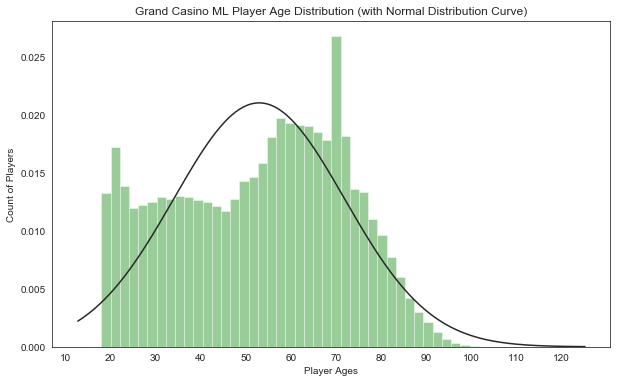

In [96]:
## Import a normal distribution from scipy
from scipy.stats import norm

## Build a new plot
plt.figure(1, figsize=(10, 6))

## Use a special function in seaborn to build a plot with the normal curve attached
sns.distplot(ml_casino_age, hist = True, fit = norm, kde = False, norm_hist = True,
             bins = 50, color = "green")

## Set the xlabels to show more buckets to help identify things better
plt.xticks(np.arange(10, 130, step = 10))

## Set better labels for the graph
plt.xlabel("Player Ages")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino ML Player Age Distribution (with Normal Distribution Curve)")

## Show the plot
plt.show()

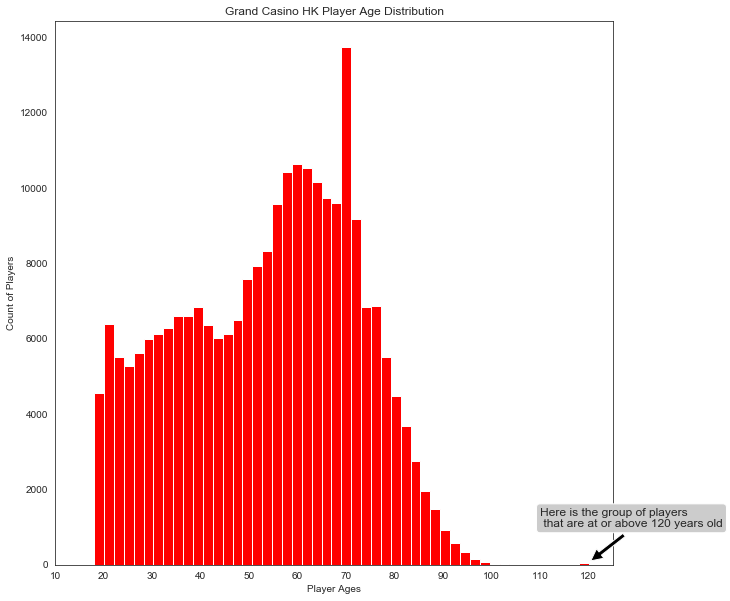

In [115]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Create a new plot figure

plt.figure(figsize= (10, 10))

## Plot the first three type / subtype combinations
plt.hist(hk_casino_age, 50, color = 'r')

## Set the xlabels to show more buckets to help identify things better
plt.xticks(np.arange(10, 130, step = 10))

## Add more descriptive labels
plt.xlabel("Player Ages")
plt.ylabel("Count of Players")

plt.annotate("Here is the group of players\n that are at or above 120 years old", 
            xy = (120.0, 60.0),
          xytext = (110.0, 1000.0),
         size = 12,
         bbox = dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(facecolor="black", shrink = 0.05))

## Add a descriptive title
plt.title("Grand Casino HK Player Age Distribution")

## Show the beautiful graph!
plt.show()

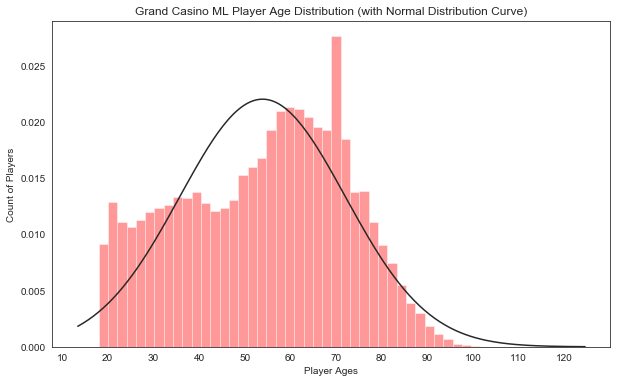

In [97]:
## Import a normal distribution from scipy
from scipy.stats import norm

## Build a new plot
plt.figure(1, figsize=(10, 6))

## Use a special function in seaborn to build a plot with the normal curve attached
sns.distplot(hk_casino_age, fit = norm, kde = False, 
             bins = 50, color = "red")

## Set the xlabels to show more buckets to help identify things better
plt.xticks(np.arange(10, 130, step = 10))

## Set better labels for the graph
plt.xlabel("Player Ages")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino ML Player Age Distribution (with Normal Distribution Curve)")

## Show the plot
plt.show()

## Next, we'll do a histogram of the estimated household income field

In [86]:
## Remove NA values from the income field as a first step to clean up

ml_casino_income = grand_casino_ml_player_dim["EstimatedHousehold Income"].dropna()

hk_casino_income = grand_casino_hk_player_dim["EstimatedHousehold Income"].dropna()

In [87]:
ml_casino_income = ml_casino_income[ml_casino_income.str.isdigit()]

ml_casino_income = ml_casino_income.astype(int)

hk_casino_income = hk_casino_income[hk_casino_income.str.isdigit()]

hk_casino_income = hk_casino_income.astype(int)

In [88]:
print(ml_casino_income.groupby(ml_casino_income).count().head())

print()

print(ml_casino_income.groupby(ml_casino_income).count().tail())

EstimatedHousehold Income
6     449
7     495
8     521
9     636
10    751
Name: EstimatedHousehold Income, dtype: int64

EstimatedHousehold Income
23647    1
24024    1
24286    1
24653    1
24981    1
Name: EstimatedHousehold Income, dtype: int64


In [89]:
## Create some buckets to better plot the distribution of estimated household income
## The spread of values is quite significant

slices = [15, 20, 30, 40, 50, 60, 70, 80, 100, 110, 120, 150, 200, 250, 300, 350, 400, 450, 500,
    550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1100, 1300, 1500, 1700, 1900,
    2000, 3000, 4000, 5000, 6000, 25500]

## Save the sliced up income to a variable
income_dissected = pd.cut(ml_casino_income, slices)

In [90]:
## Save the sliced up income to a variable

income_dissected.value_counts(sort = False)

(15, 20]          4052
(20, 30]          7718
(30, 40]          9267
(40, 50]         10453
(50, 60]          8021
(60, 70]         12211
(70, 80]          9077
(80, 100]        14980
(100, 110]        3464
(110, 120]        6063
(120, 150]        8202
(150, 200]        4816
(200, 250]        3551
(250, 300]           0
(300, 350]           0
(350, 400]           0
(400, 450]           0
(450, 500]           0
(500, 550]           0
(550, 600]           0
(600, 650]           0
(650, 700]           0
(700, 750]           0
(750, 800]           0
(800, 850]           0
(850, 900]           0
(900, 950]           0
(950, 1000]          0
(1000, 1100]         0
(1100, 1300]         0
(1300, 1500]         0
(1500, 1700]         0
(1700, 1900]         0
(1900, 2000]         0
(2000, 3000]         0
(3000, 4000]         0
(4000, 5000]         0
(5000, 6000]         1
(6000, 25500]       55
Name: EstimatedHousehold Income, dtype: int64

## What an interesting observation on the incomes!  There is a large gap between the household incomes below $250K a year and above that line - and only 56 observations with household income above 6M a year.

## So we will subset this dataset one more time for household incomes below $250K.

In [91]:
## Subset the incomes below $250000

ml_casino_income_below_250 = ml_casino_income[ml_casino_income < 250]

hk_casino_income_below_250 = hk_casino_income[hk_casino_income < 250]

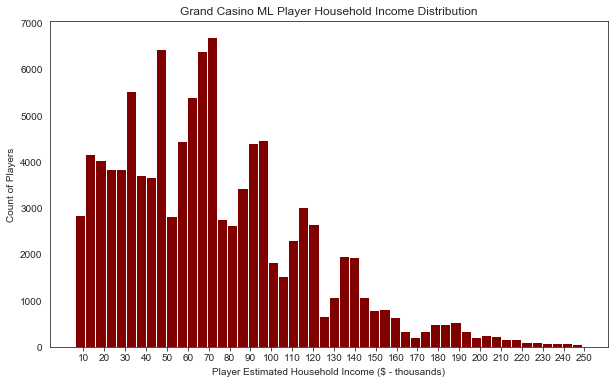

In [98]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Create a new plot figure

plt.figure(figsize= (10, 6))

## Plot the first three type / subtype combinations
plt.hist(ml_casino_income_below_250, 50, color = 'maroon')

plt.xticks(np.arange(10, 260, step = 10))

plt.tick_params(bottom = True)

## Set better labels for the graph
plt.xlabel("Player Estimated Household Income ($ - thousands)")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino ML Player Household Income Distribution")

## Show the plot
plt.show()

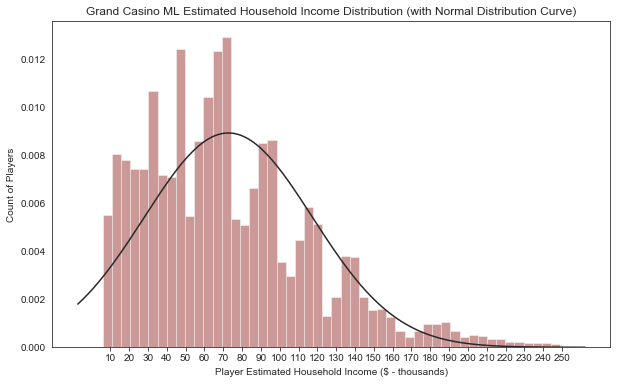

In [99]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Create a new plot figure

plt.figure(figsize= (10, 6))

## Use a special function in seaborn to build a plot with the normal curve attached
sns.distplot(ml_casino_income_below_250, fit = norm, kde = False, color = "maroon")

plt.xticks(np.arange(10, 260, step = 10))

plt.tick_params(bottom = True)

## Set better labels for the graph
plt.xlabel("Player Estimated Household Income ($ - thousands)")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino ML Estimated Household Income Distribution (with Normal Distribution Curve)")

## Show the plot
plt.show()

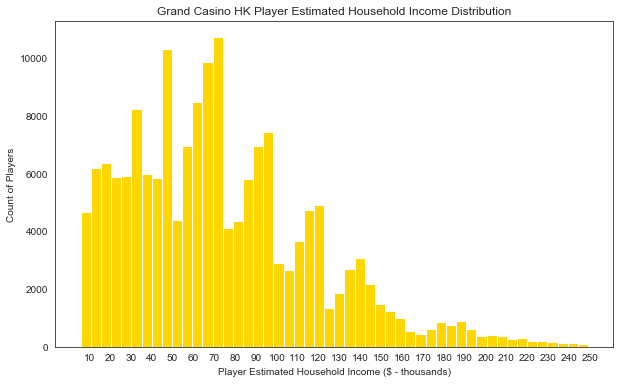

In [100]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Create a new plot figure

plt.figure(figsize= (10, 6))

## Plot the first three type / subtype combinations
plt.hist(hk_casino_income_below_250, 50, color = 'gold')

plt.xticks(np.arange(10, 260, step = 10))

## Set better labels for the graph
plt.xlabel("Player Estimated Household Income ($ - thousands)")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino HK Player Estimated Household Income Distribution")

## Show the plot
plt.show()

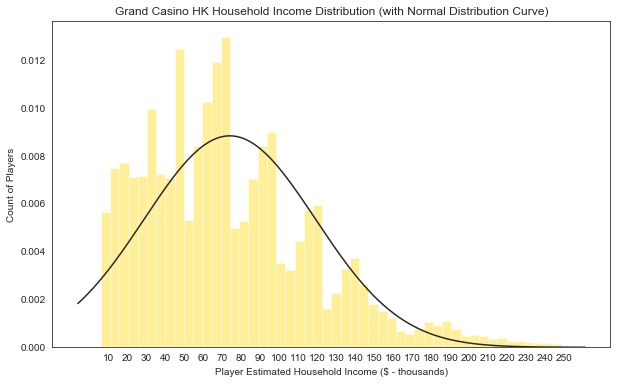

In [101]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Create a new plot figure

plt.figure(figsize= (10, 6))

## Use a special function in seaborn to build a plot with the normal curve attached
sns.distplot(hk_casino_income_below_250, fit = norm, kde = False, color = "gold")

plt.xticks(np.arange(10, 260, step = 10))

## Set better labels for the graph
plt.xlabel("Player Estimated Household Income ($ - thousands)")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino HK Household Income Distribution (with Normal Distribution Curve)")

## Show the plot
plt.show()

## Normally, we would be completing our journey here.  However, we want to take a look at the distributions of players by their tier status to see if there's any patterns to be observed.

In [146]:
## Show the length of the original dataframes for the player dim and coupon fact

print(len(player_dim_df_subset))

print()

print(len(coupon_fact_df))

397620

2777358


In [147]:
## Confirm we don't have any "strange" Ages in the dataframe

player_ages = player_dim_df_subset.Age

print(min(player_ages))
print()

print(max(player_ages))

## Show the first few lines of the dataframe

player_dim_df_subset.head()

18

120


,Casino Site,City,State,Zip Code,Player Tier,Last Gamble Date,Month,Year,Marital Status,EstimatedHousehold Income,No. of Dependents,Marital Status,Birth Date,Age
0,Grand Casino ML,ELK RIVER,MN,55330,Preferred,2019-10-16 18:40:18.000,7,1961,Married Extremely Likely,138,Not as Likely to have a child,Married Extremely Likely,1961-07-01 00:00:00,58
1,Grand Casino ML,GARFIELD,MN,56332,Preferred,2019-10-24 07:22:04.000,9,1935,Married Extremely Likely,36,Not Likely to have a child,Married Extremely Likely,1935-09-01 00:00:00,84
2,Grand Casino ML,ELK RIVER,MN,55330,Preferred,2019-10-23 07:46:00.000,10,1938,Unknown Scored,18,Not Likely to have a child,Unknown Scored,1938-10-01 00:00:00,81
3,Grand Casino ML,TALMOON,MN,56637,Preferred,2019-09-29 09:41:27.000,12,1951,Married Extremely Likely,49,Not Likely to have a child,Married Extremely Likely,1951-12-01 00:00:00,68
4,Grand Casino ML,PEQUOT LAKES,MN,56472,Preferred,2019-06-27 21:50:12.000,7,1964,NaN,NaN,NaN,NaN,1964-07-01 00:00:00,55


In [240]:
## Group the dataframe by Player Tier and Age to build a histogram

player_tier_age_count_df = \
            player_dim_df_subset.groupby(["Player Tier", "Age"]).agg({"Month": "count"}).reset_index()

## Rename our "count" column so that the table makes more sense
player_tier_age_count_df.rename(columns = {"Month": "Player Count"}, inplace = True)

## Sort by count to see what our biggest Player Tier and Age Group combinations are
player_tier_age_count_df.sort_values("Player Count", ascending = False, inplace = True)

## Show the first 5 rows of the new dataframe
player_tier_age_count_df.head(20)

,Player Tier,Age,Player Count
359,Preferred,59,7488
358,Preferred,58,7481
362,Preferred,62,7391
360,Preferred,60,7321
357,Preferred,57,7320
363,Preferred,63,7293
361,Preferred,61,7260
356,Preferred,56,7007
364,Preferred,64,6951
365,Preferred,65,6929


In [241]:
## Sort the values of the dataframe by Age, to save us this step on all the subsequent dataframes

player_tier_age_count_df.sort_values(by = "Age", inplace = True)

In [242]:
## See what unique player tiers we have

player_tier_age_count_df["Player Tier"].unique()

array(['Preferred', 'Associate Gaming', 'Silver', 'Gold', 'Vendor 250',
       'Vendor 40', 'AssociateTest', 'Platinum', 'Diamond', 'Admin'],
      dtype=object)

## Curiosity strikes again - how many players belong to each group?  Are there any that may not provide any additional context or clarity?

In [243]:
player_tier_age_count_df.groupby("Player Tier").agg({"Player Count": "sum"}).reset_index(). \
            sort_values(by = "Player Count", ascending = False)

,Player Tier,Player Count
6,Preferred,360752
7,Silver,19668
4,Gold,12375
1,Associate Gaming,2033
5,Platinum,1776
3,Diamond,847
8,Vendor 250,69
0,Admin,45
2,AssociateTest,33
9,Vendor 40,22


## Confirming our suspicion, anything belong to the tier below "Diamond" has a very low count of players; possibly these tiers were test categories.

## For this reason we combine them together in their own category known as "All Other Tiers".

In [246]:
## Replace each row that has a tier other than the top 7 and replace it with "All Other Tiers"
## This will replace the values IN PLACE, so we only want to do this once - we won't be able to revert back without having to 
## recreate the dataframe from scratch.

## Save the tiers we want to overwrite to a list
tiers_to_replace = ["Vendor 250", "Admin", "AssociateTest", "Vendor 40"]

## Use the dataframe replace function to overwrite the rows with our new category and then save over our original dataframe
player_tier_age_count_df = player_tier_age_count_df.replace(tiers_to_replace, "All Other Tiers")

In [267]:
## Aggregate the table again now that we have new categories and save it to a new variable

player_tier_aggregate_df = \
        player_tier_age_count_df.groupby("Player Tier").agg({"Player Count": "sum"}).reset_index(). \
                    sort_values(by = "Player Count", ascending = False)

## Reformat our table so that is more presentable
player_tier_aggregate_df["Player Count"] = player_tier_aggregate_df["Player Count"].map("{:,}".format)

## Show the new table!
HTML(player_tier_aggregate_df.to_html(index = False))

Player Tier,Player Count
Preferred,"360,752"
Silver,"19,668"
Gold,"12,375"
Associate Gaming,"2,033"
Platinum,"1,776"
Diamond,847
All Other Tiers,169


## And our transformation was successful!  Great.

In [268]:
## Create a new list with the tiers we are going to focus on

tier_list = ["Preferred", "Silver", "Gold", "Associate Gaming", "Platinum", "Diamond", "All Other Tiers"]

## Create a new list to contain our dataframes needed for the visualization
tier_dfs = []

## Loop through the tiers we identified in our list above
for i in tier_list:
    ## Generate a new dataframe for each tier
    i_df = player_tier_age_count_df[player_tier_age_count_df["Player Tier"] == i]
    ## Append each dataframe to our list - we will pull these out in a second
    tier_dfs.append(i_df)

In [269]:
## We're going to do a similar loop through this new list - extract the "X" and "Y" variables that we will need
## for our visualization

player_tier_x_vars = []
player_tier_y_vars = []

count = 0

for i in tier_dfs:
    player_tier_x_vars.append(i.Age)
    player_tier_y_vars.append(i["Player Count"])

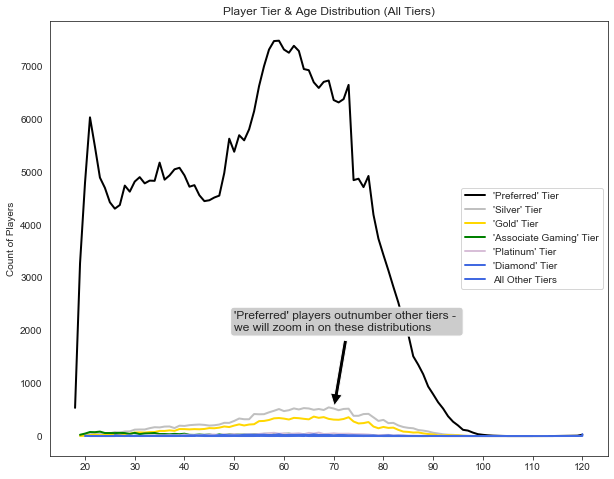

In [311]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 8))

## Plot the first three type / subtype combinations
plt.plot(player_tier_x_vars[0], player_tier_y_vars[0], color = "black", lw = 2, label = "'Preferred' Tier")
plt.plot(player_tier_x_vars[1], player_tier_y_vars[1], color = "silver", lw = 2, label = "'Silver' Tier")
plt.plot(player_tier_x_vars[2], player_tier_y_vars[2], color = "gold", lw = 2, label = "'Gold' Tier")
plt.plot(player_tier_x_vars[3], player_tier_y_vars[3], color = "green", 
                                                     lw = 2, label = "'Associate Gaming' Tier")
plt.plot(player_tier_x_vars[4], player_tier_y_vars[4], color = "thistle", lw = 2, label = "'Platinum' Tier")
plt.plot(player_tier_x_vars[5], player_tier_y_vars[5], color = "royalblue", lw = 2, label = "'Diamond' Tier")

plt.plot(player_tier_x_vars[6], player_tier_y_vars[6], color = "royalblue", lw = 2, label = "All Other Tiers")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Set a descriptive title

plt.ylabel("Count of Players")
plt.title("Player Tier & Age Distribution (All Tiers)")
plt.legend(loc = "right")
plt.xticks(np.arange(20, 130, step = 10))

ax = plt.gca()
ax.tick_params(bottom = True)

plt.annotate("'Preferred' players outnumber other tiers - \nwe will zoom in on these distributions", 
            xy = (70.0, 500.0),
          xytext = (50.0, 2000.0),
         size = 12,
         bbox = dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(facecolor="black", shrink = 0.05))

## Show the graph!
plt.show()

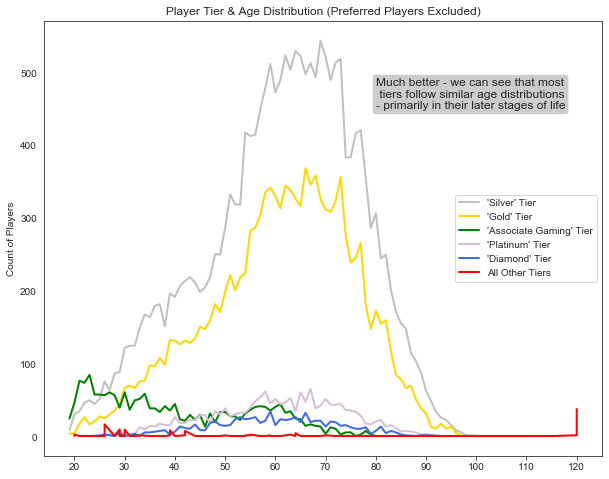

In [318]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 8))

## Plot the first three type / subtype combinations
plt.plot(player_tier_x_vars[1], player_tier_y_vars[1], color = "silver", lw = 2, label = "'Silver' Tier")
plt.plot(player_tier_x_vars[2], player_tier_y_vars[2], color = "gold", lw = 2, label = "'Gold' Tier")
plt.plot(player_tier_x_vars[3], player_tier_y_vars[3], color = "green", 
                                                     lw = 2, label = "'Associate Gaming' Tier")
plt.plot(player_tier_x_vars[4], player_tier_y_vars[4], color = "thistle", lw = 2, label = "'Platinum' Tier")
plt.plot(player_tier_x_vars[5], player_tier_y_vars[5], color = "royalblue", lw = 2, label = "'Diamond' Tier")

plt.plot(player_tier_x_vars[6], player_tier_y_vars[6], color = "red", lw = 2, label = "All Other Tiers")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Set a descriptive title

plt.ylabel("Count of Players")
plt.title("Player Tier & Age Distribution (Preferred Players Excluded)")
plt.legend(loc = "center right")

plt.xticks(np.arange(20, 130, step = 10))

ax = plt.gca()
ax.tick_params(bottom = True)

plt.annotate("Much better - we can see that most\n tiers follow similar age distributions\n- primarily in their later stages of life", 
            xy = (70.0, 500.0),
          xytext = (80.0, 450.0),
         size = 12,
         bbox = dict(boxstyle="round", fc="0.8"))


## Show the graph!
plt.show()